In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC, NuSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm

In [4]:
train_spectral = pd.read_csv(r'C:\Users\Callum\Desktop\cab420\CAB420Assignment1A\training.csv')
test_spectral = pd.read_csv(r'C:\Users\Callum\Desktop\cab420\CAB420Assignment1A\testing.csv')

In [4]:
print(train_spectral.head())

  class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0    d   39  36  57   91  59  101   93  27  60  ...                -2.36   
1    h   84  30  57  112  51   98   92  26  62  ...                -2.26   
2    s   53  25  49   99  51   93   84  26  58  ...                -1.46   
3    s   59  26  49  103  47   92   82  25  56  ...                 2.68   
4    d   57  49  66  103  64  106  114  28  59  ...                -2.94   

   pred_minus_obs_S_b1  pred_minus_obs_S_b2  pred_minus_obs_S_b3  \
0               -18.41                -1.88                -6.43   
1               -16.27                -1.95                -6.25   
2               -15.92                -1.79                -4.64   
3               -13.77                -2.53                -6.34   
4               -21.74                -1.64                -4.62   

   pred_minus_obs_S_b4  pred_minus_obs_S_b5  pred_minus_obs_S_b6  \
0               -21.03                -1.60                -6.18  

In [5]:
print(test_spectral.head())

  class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0    d   67  51  68  115  69  111  136  31  67  ...                -9.17   
1    s   67  28  51   99  50   97   82  26  59  ...                -2.25   
2    s   63  26  50   95  49   91   81  26  57  ...                -0.44   
3    d   63  42  63   97  66  108  111  28  59  ...                -2.34   
4    s   46  27  50   83  51   90   76  26  56  ...                 1.25   

   pred_minus_obs_S_b1  pred_minus_obs_S_b2  pred_minus_obs_S_b3  \
0               -18.27                -1.80                -6.32   
1               -20.13                -2.11                -6.35   
2               -17.64                -1.81                -4.70   
3               -20.20                -1.89                -5.47   
4               -18.62                -2.17                -7.11   

   pred_minus_obs_S_b4  pred_minus_obs_S_b5  pred_minus_obs_S_b6  \
0               -20.88                -1.63                -6.13  

In [5]:
test_spectral['class'] = pd.Categorical(test_spectral['class'])
train_spectral['class'] = pd.Categorical(train_spectral['class'])

predictionColumn_test = test_spectral['class']
predictors_test = test_spectral.drop('class', axis=1)

Y_train = train_spectral['class']
X_train = train_spectral.drop('class', axis=1)

X_test, X_val, Y_test, Y_val = train_test_split(predictors_test, predictionColumn_test, test_size=0.8, random_state=1)




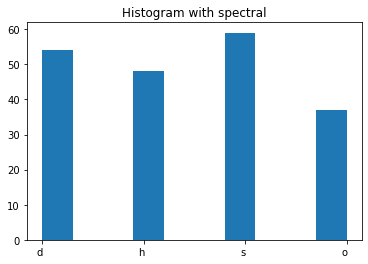

In [7]:
import matplotlib.pyplot as plt
spectral_hist = plt.hist(train_spectral['class']) 
plt.title("Histogram with spectral")
plt.show()

Good spread, smaller number of '0' but enough to not make too much of a difference

In [97]:
def eval_model(model, X_train, Y_train, X_test, Y_test, graphs, ):
    if(graphs):
        fig = plt.figure(figsize=[25, 8])
        ax = fig.add_subplot(1, 2, 1)
        conf = plot_confusion_matrix(model, X_train, Y_train, normalize='true', ax=ax)
        conf.ax_.set_title('Training Set Performance');
        ax = fig.add_subplot(1, 2, 2)
        conf = plot_confusion_matrix(model, X_test, Y_test, normalize='true', ax=ax)
        conf.ax_.set_title('Validation Test Set Performance');
    pred = model.predict(X_test)
    return str(sum(pred == Y_test)/len(Y_test))

In [84]:
def knn_func(p, title):    
    test_accuracy = {}
    x_dist = []
    y_dist = []
    x_nodist = []
    y_nodist = []
    for i in range(3, 30, 2):
        for x in range(0,2):
            if(x == 0):
                cknn = KNeighborsClassifier(n_neighbors=i, weights='distance', p=p)
            else:
                cknn = KNeighborsClassifier(n_neighbors=i, p=p)
            cknn.fit(X_train, Y_train)
            test_accur = eval_model(cknn, X_train, Y_train, X_test, Y_test, False)
            if(x == 0):
                test_accuracy[i, "Dist"] = (test_accur)
                x_dist.append(i)
                y_dist.append(float(test_accur))
            else:
                test_accuracy[i, "No Dist"] = (test_accur)
                x_nodist.append(i)
                y_nodist.append(float(test_accur))

    print(test_accuracy)
    import operator
    print(max(test_accuracy.items(), key=operator.itemgetter(1))[0])
    plt.figure(figsize=(10,10))

    plt.plot(x_dist, y_dist, label='Distance Weight', marker='x' )
    plt.plot(x_nodist, y_nodist, label='No Distance Weight', marker='o' )
    plt.ylabel('Test Accruacy') 
    plt.xlabel('n_neighbours') 
    
    if(p == 1):
        
        plt.annotate('(5, 0.8461538461538461)', xy=(5, 0.8461538461538461))
    else:
        plt.annotate('(3, 0.8615384615384616)', xy=(3, 0.8615384615384616))
    plt.legend()
    plt.title(title)
    plt.show()


{(3, 'Dist'): '0.8461538461538461', (3, 'No Dist'): '0.8461538461538461', (5, 'Dist'): '0.8461538461538461', (5, 'No Dist'): '0.8461538461538461', (7, 'Dist'): '0.8', (7, 'No Dist'): '0.8', (9, 'Dist'): '0.8', (9, 'No Dist'): '0.8', (11, 'Dist'): '0.7846153846153846', (11, 'No Dist'): '0.7846153846153846', (13, 'Dist'): '0.7846153846153846', (13, 'No Dist'): '0.7846153846153846', (15, 'Dist'): '0.7846153846153846', (15, 'No Dist'): '0.7846153846153846', (17, 'Dist'): '0.7846153846153846', (17, 'No Dist'): '0.7846153846153846', (19, 'Dist'): '0.7846153846153846', (19, 'No Dist'): '0.7692307692307693', (21, 'Dist'): '0.7846153846153846', (21, 'No Dist'): '0.7846153846153846', (23, 'Dist'): '0.7692307692307693', (23, 'No Dist'): '0.7692307692307693', (25, 'Dist'): '0.7846153846153846', (25, 'No Dist'): '0.7846153846153846', (27, 'Dist'): '0.7846153846153846', (27, 'No Dist'): '0.7846153846153846', (29, 'Dist'): '0.7846153846153846', (29, 'No Dist'): '0.7846153846153846'}
(3, 'Dist')


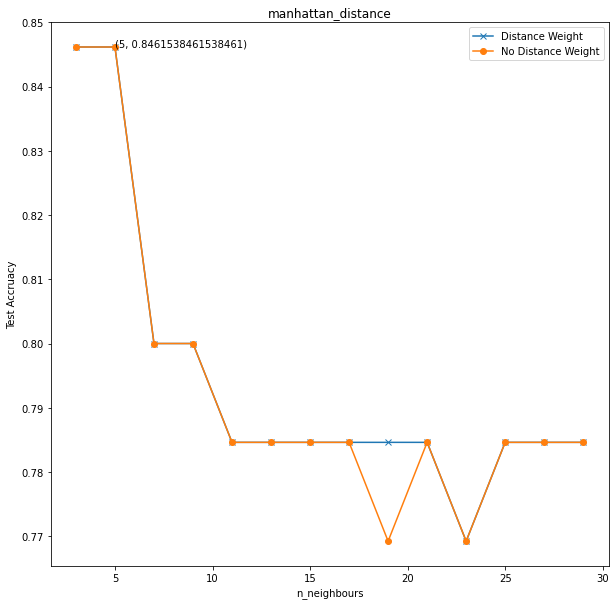

{(3, 'Dist'): '0.8615384615384616', (3, 'No Dist'): '0.8615384615384616', (5, 'Dist'): '0.8461538461538461', (5, 'No Dist'): '0.8461538461538461', (7, 'Dist'): '0.8461538461538461', (7, 'No Dist'): '0.8461538461538461', (9, 'Dist'): '0.8461538461538461', (9, 'No Dist'): '0.8461538461538461', (11, 'Dist'): '0.8461538461538461', (11, 'No Dist'): '0.8461538461538461', (13, 'Dist'): '0.8461538461538461', (13, 'No Dist'): '0.8461538461538461', (15, 'Dist'): '0.8461538461538461', (15, 'No Dist'): '0.8461538461538461', (17, 'Dist'): '0.8461538461538461', (17, 'No Dist'): '0.8461538461538461', (19, 'Dist'): '0.8461538461538461', (19, 'No Dist'): '0.8307692307692308', (21, 'Dist'): '0.8307692307692308', (21, 'No Dist'): '0.8307692307692308', (23, 'Dist'): '0.8307692307692308', (23, 'No Dist'): '0.8153846153846154', (25, 'Dist'): '0.8153846153846154', (25, 'No Dist'): '0.8153846153846154', (27, 'Dist'): '0.8153846153846154', (27, 'No Dist'): '0.7846153846153846', (29, 'Dist'): '0.815384615384615

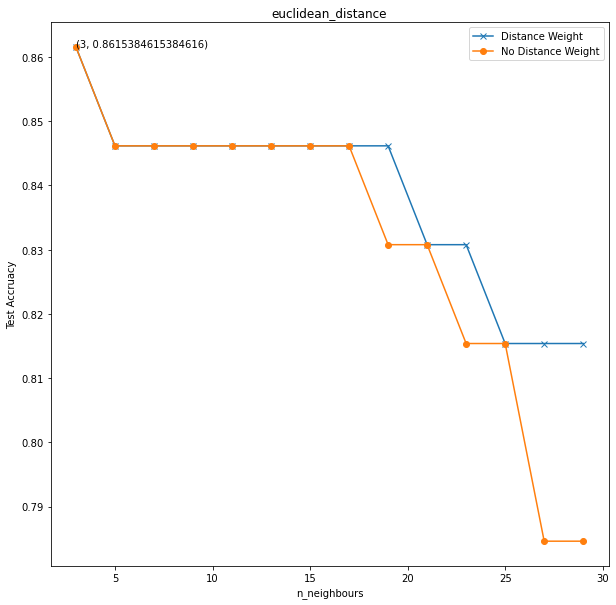

In [85]:
knn_func(1, "manhattan_distance")
knn_func(2, "euclidean_distance")

0.8346153846153846
Test Accuracy:  0.8346153846153846


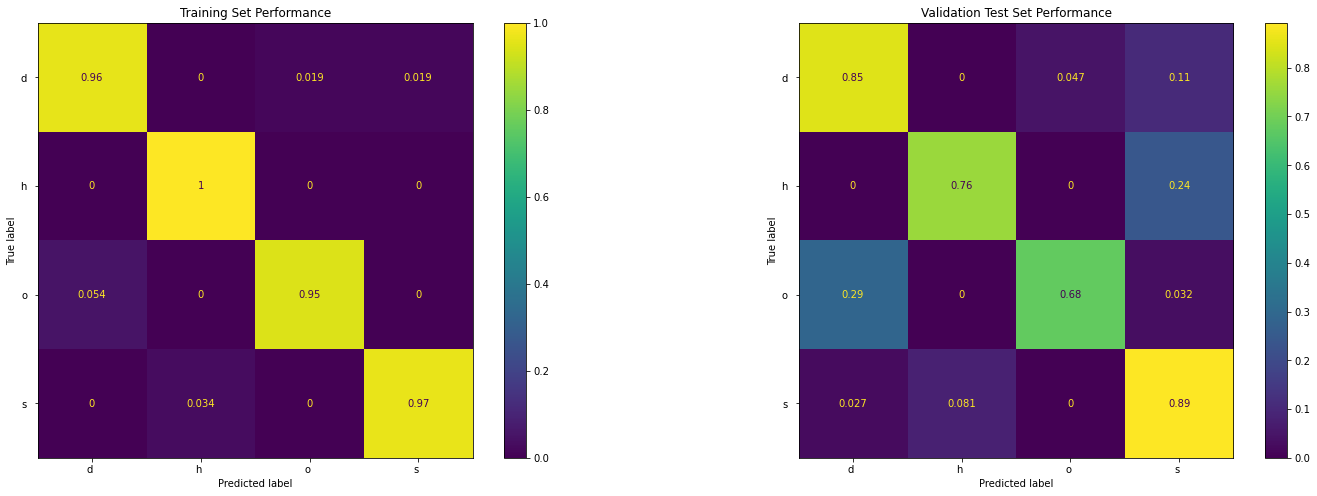

In [101]:


#Make the model
cknn = KNeighborsClassifier(n_neighbors=5,  p = 1 )
cknn.fit(X_train, Y_train)
test_accur = eval_model(cknn, X_train, Y_train, X_val, Y_val, True)
print("Test Accuracy: ", test_accur)


0.8346153846153846
Test Accuracy:  0.8346153846153846


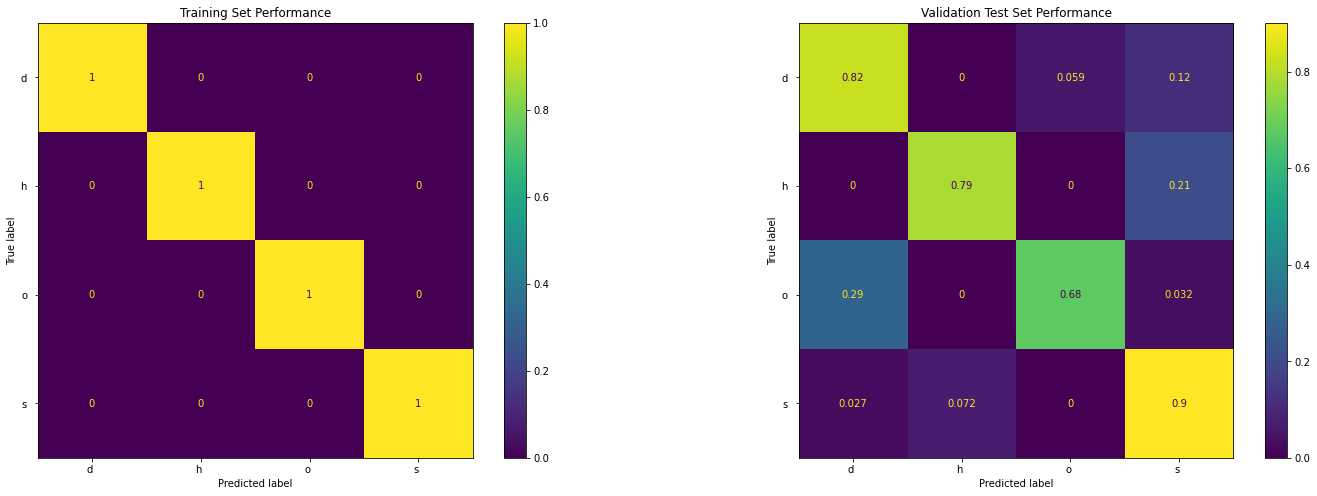

In [102]:
#Make the model
cknn = KNeighborsClassifier(n_neighbors=3, weights='distance' , p = 2)
cknn.fit(X_train, Y_train)
test_accur = eval_model(cknn, X_train, Y_train, X_val, Y_val, True)
print("Test Accuracy: ", test_accur)

## One vs. One


              precision    recall  f1-score   support

          d        0.82      0.70      0.76        20
          h        0.62      1.00      0.77         5
          o        0.92      0.73      0.81        15
          s        0.82      0.92      0.87        25

    accuracy                           0.82        65
   macro avg       0.80      0.84      0.80        65
weighted avg       0.83      0.82      0.81        65



'0.8153846153846154'

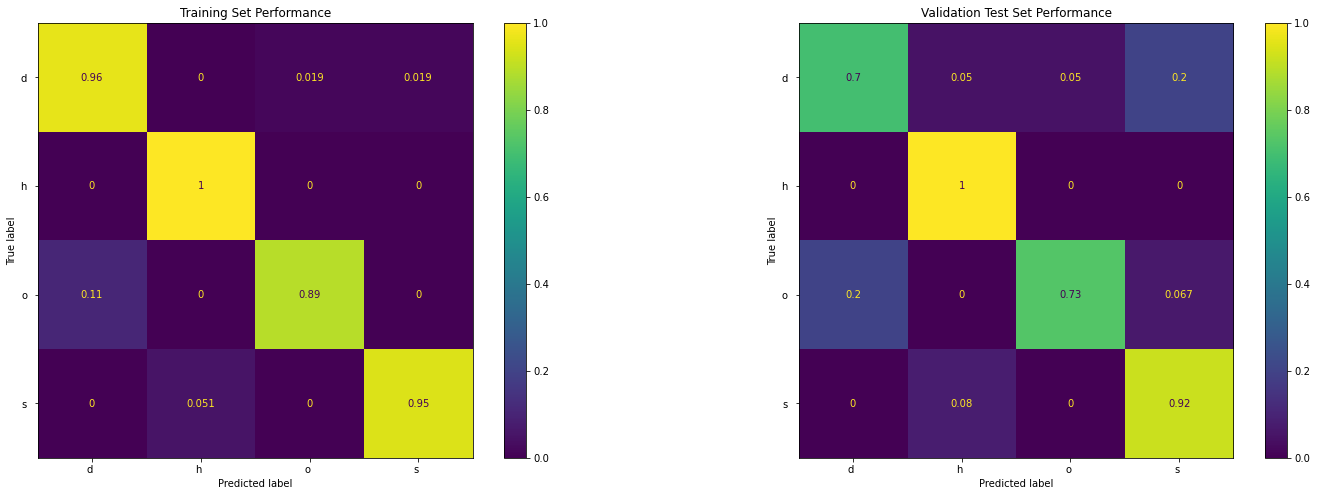

In [23]:
svm = SVC()
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test, True)

              precision    recall  f1-score   support

          d        0.88      0.70      0.78        20
          h        0.62      1.00      0.77         5
          o        0.92      0.80      0.86        15
          s        0.82      0.92      0.87        25

    accuracy                           0.83        65
   macro avg       0.81      0.85      0.82        65
weighted avg       0.85      0.83      0.83        65



'0.8307692307692308'

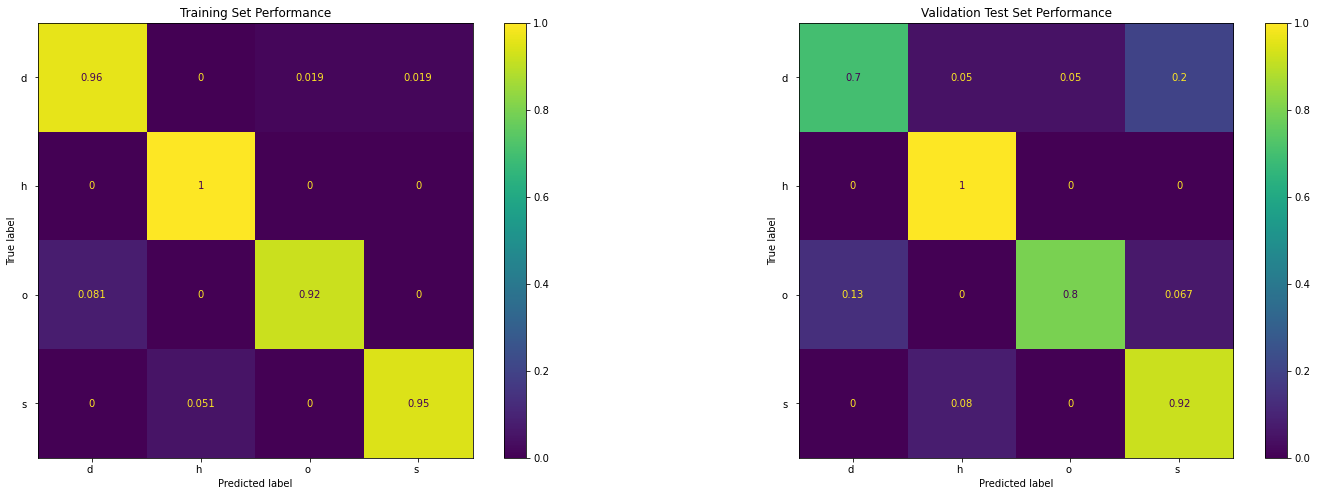

In [12]:
#Additional weight class_weight
svm = SVC(class_weight='balanced')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test, True)




              precision    recall  f1-score   support

          d        0.94      0.80      0.86        20
          h        0.62      1.00      0.77         5
          o        0.87      0.87      0.87        15
          s        0.92      0.92      0.92        25

    accuracy                           0.88        65
   macro avg       0.84      0.90      0.86        65
weighted avg       0.89      0.88      0.88        65

{('C:', 2, ' Kernel: ', 'rbf', ' Gamma: ', 0.0001): 0.8769230769230769, ('C:', 2, ' Kernel: ', 'rbf', ' Gamma: ', 0.001): 0.8769230769230769, ('C:', 3, ' Kernel: ', 'rbf', ' Gamma: ', 0.0001): 0.8769230769230769, ('C:', 3, ' Kernel: ', 'rbf', ' Gamma: ', 0.001): 0.8769230769230769, ('C:', 4, ' Kernel: ', 'rbf', ' Gamma: ', 0.0001): 0.8769230769230769, ('C:', 4, ' Kernel: ', 'rbf', ' Gamma: ', 0.001): 0.8769230769230769, ('C:', 5, ' Kernel: ', 'rbf', ' Gamma: ', 0.001): 0.8769230769230769, ('C:', 6, ' Kernel: ', 'rbf', ' Gamma: ', 0.001): 0.8769230769230769, (

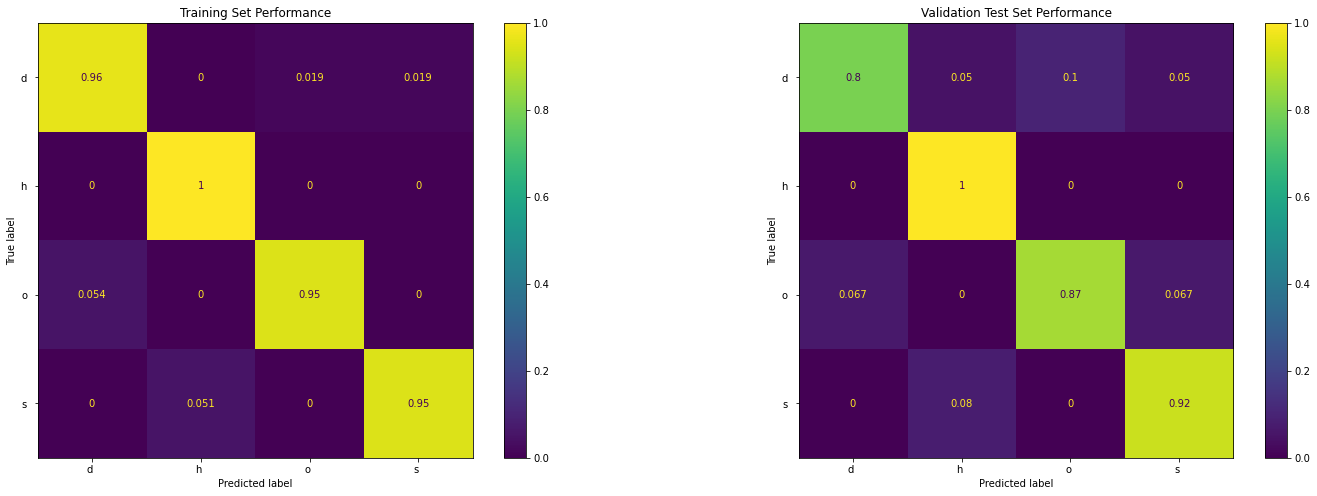

In [73]:
estimator__kernel = [ 'rbf', 'poly', 'linear']
gamma_values = [0.0001, 0.001, 0.01, 0.1]
accuracy_max = 0
accur_obj = {}
# x_scale_rbf=[]
# y_scale_rbf = []
# x_scale_linear=[]
# y_scale_linear = []
# x_scale_poly=[]
# y_scale_poly = []

for i in range(1,50):
     for y,gammas in enumerate(gamma_values):
        for x,elem in enumerate(estimator__kernel):
            search = SVC(class_weight='balanced', C=i, kernel=elem, gamma = gammas)
            search.fit(X_train, Y_train)
            predicted = search.predict(X_test)
            accur = accuracy_score(Y_test, predicted)
            if(accur >= accuracy_max):
                name = "C:" , i+1, " Kernel: ", elem , " Gamma: ", gammas
                accur_obj[name] =  accuracy_max
                if(accur > accuracy_max):
                    best = search
                    accur_obj = {}
                    accuracy_max = accur
                    name = "C:" , i+1, " Kernel: ", elem , " Gamma: ", gammas
                    accur_obj = {name: accuracy_max}
eval_model(best, X_train, Y_train, X_test, Y_test, True)


print(accur_obj)


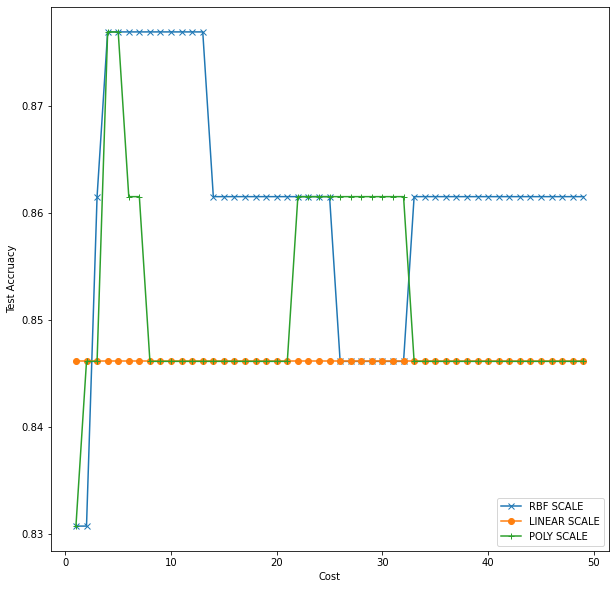

In [69]:
# plt.figure(figsize=(10,10))

# plt.plot(x_scale_rbf, y_scale_rbf,marker='x',label='RBF SCALE' )
# plt.plot(x_scale_linear, y_scale_linear,marker='o',label='LINEAR SCALE' )
# plt.plot(x_scale_poly, y_scale_poly,marker='+',label='POLY SCALE' )








# plt.ylabel('Test Accruacy') 
# plt.xlabel('Cost') 

# plt.legend(loc="lower right")
# plt.show()

              precision    recall  f1-score   support

          d        0.88      0.76      0.82        85
          h        0.74      0.76      0.75        33
          o        0.79      0.74      0.77        31
          s        0.82      0.91      0.86       111

    accuracy                           0.82       260
   macro avg       0.81      0.79      0.80       260
weighted avg       0.83      0.82      0.82       260



'0.823076923076923'

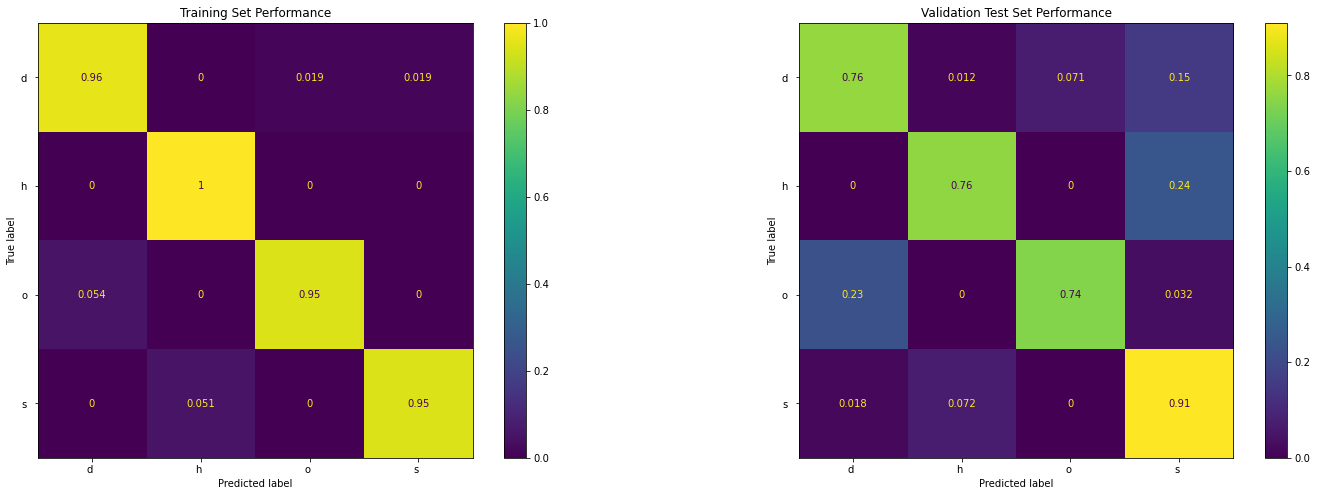

In [16]:
eval_model(best, X_train, Y_train, X_val, Y_val, True)


## One vs. ALL


OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight='balanced', coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)
              precision    recall  f1-score   support

          d        0.88      0.75      0.81        20
          h        0.62      1.00      0.77         5
          o        1.00      0.80      0.89        15
          s        0.82      0.92      0.87        25

    accuracy                           0.85        65
   macro avg       0.83      0.87      0.83        65
weighted avg       0.87      0.85      0.85        65

0.8076923076923077


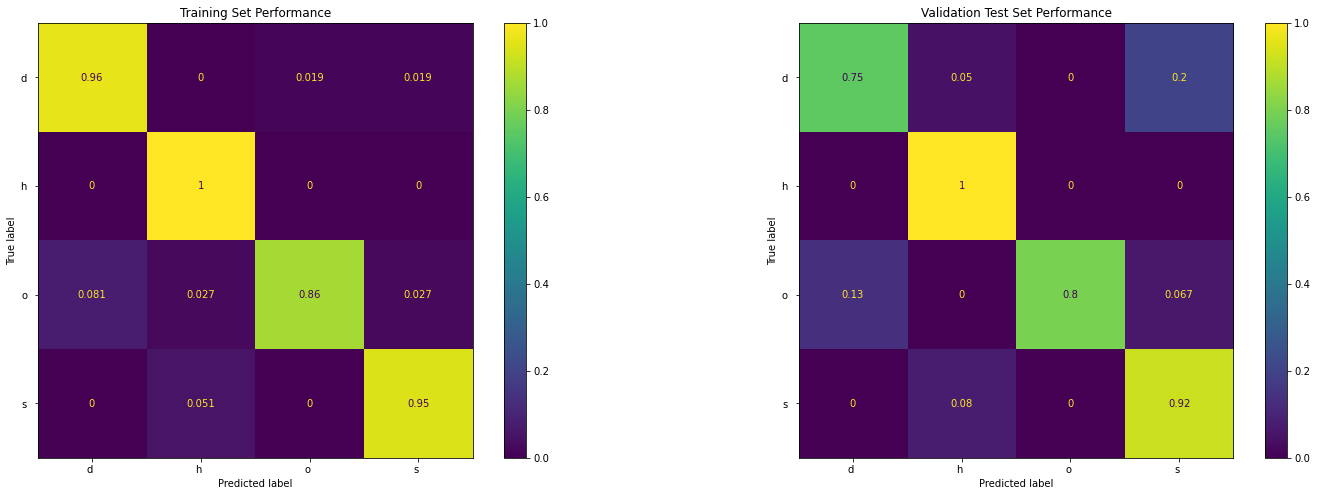

In [17]:
onevsall_svm = OneVsRestClassifier(SVC(class_weight='balanced'))
print(onevsall_svm)
onevsall_svm.fit(X_train, Y_train)
eval_model(onevsall_svm, X_train, Y_train, X_test, Y_test, True)

predicted_svm = onevsall_svm.predict(X_val)
accur_svm = accuracy_score(Y_val, predicted_svm)
print(accur_svm)

Lets optimize the hyperparamters for 1vall

              precision    recall  f1-score   support

          d        0.94      0.85      0.89        20
          h        0.71      1.00      0.83         5
          o        0.87      0.87      0.87        15
          s        0.92      0.92      0.92        25

    accuracy                           0.89        65
   macro avg       0.86      0.91      0.88        65
weighted avg       0.90      0.89      0.89        65

{('C:', 2, ' Kernel: ', 'rbf', ' Gamma: ', 0.001): 0.8923076923076924, ('C:', 3, ' Kernel: ', 'rbf', ' Gamma: ', 0.001): 0.8923076923076924, ('C:', 4, ' Kernel: ', 'rbf', ' Gamma: ', 0.001): 0.8923076923076924}


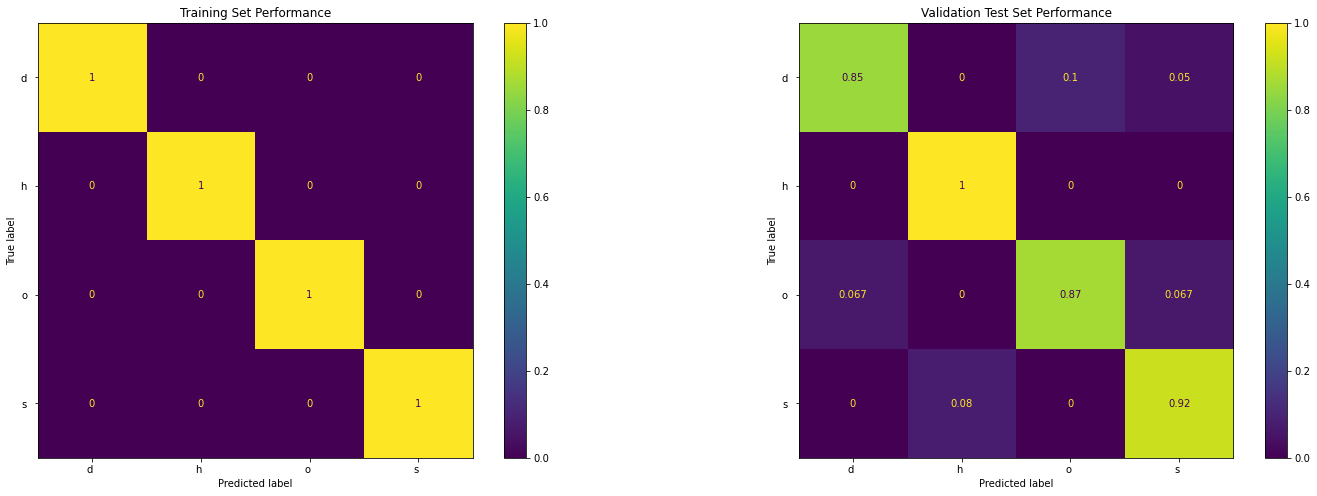

In [74]:
estimator__kernel = [ 'rbf', 'linear', 'poly']
gamma_values = [0.0001, 0.001, 0.01, 0.1]
accuracy_max = 0
accur_obj = {}
x_scale=[]
y_scale = []

x_auto=[]
y_auto = []




for i in range(1,50):
    for y,gammas in enumerate(gamma_values):
        for x,elem in enumerate(estimator__kernel):
            search = OneVsRestClassifier(SVC(class_weight='balanced', C=i, kernel=elem, gamma=gammas))
            search.fit(X_train, Y_train)
            predicted = search.predict(X_test)
            accur = accuracy_score(Y_test, predicted)
            if(gammas == 'scale'):
                x_scale.append(i)
                y_scale.append(accur)
            else:
                x_auto.append(i)
                y_auto.append(accur)
            if(accur >= accuracy_max):
                name = "C:" , i+1, " Kernel: ", elem , " Gamma: ", gammas
                accur_obj[name] =  accuracy_max
                if(accur > accuracy_max):
                    best2 = search
                    accur_obj = {}
                    accuracy_max = accur
                    name = "C:" , i+1, " Kernel: ", elem , " Gamma: ", gammas
                    accur_obj = {name: accuracy_max}
eval_model(best2, X_train, Y_train, X_test, Y_test, True)


print(accur_obj)


              precision    recall  f1-score   support

          d        0.89      0.85      0.87        85
          h        0.74      0.76      0.75        33
          o        0.71      0.81      0.76        31
          s        0.88      0.87      0.88       111

    accuracy                           0.84       260
   macro avg       0.81      0.82      0.81       260
weighted avg       0.85      0.84      0.84       260



'0.8423076923076923'

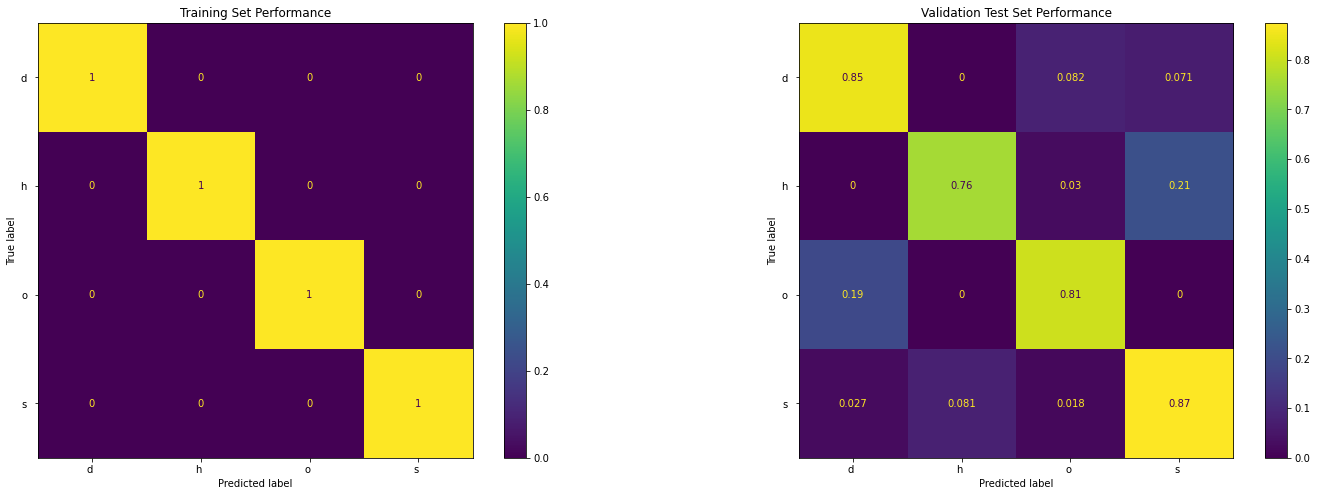

In [75]:
eval_model(best2, X_train, Y_train, X_val, Y_val, True)

